In [4]:
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:

def plot_data(filenames, variable, problem):
    # Lectura de archivos
    dfs = [pd.read_csv(filename, delimiter='\t', error_bad_lines=False, skipfooter=1, engine='python') for filename in filenames]

    # Generación dinámica de contenido
    variable_names = [r'$\alpha$', 'epochs', 'paciencia', 'capa_oculta']
    variable_values = [x.split('/')[1].replace('.dat', '').split('-')[variable] for x in filenames]
    configuration = []
    for i in range(4):
        if i != variable:
            data = filenames[0].split('/')[1].replace('.dat', '').split('-')[i]
            configuration.append(variable_names[i] + "=" + data)

    title = 'Problema Real ' + problem + ': ' + ' '.join(configuration)
    legend = [variable_names[variable] + "=" + x for x in variable_values]

    # Configuración de figura
    fig = plt.figure(figsize=(5,10))
    gs = fig.add_gridspec(3, hspace=0.05)
    ax1, ax2, ax3 = gs.subplots(sharex=True)

    fig.suptitle(title)
    
    [ax1.plot(df.iloc[:, 0].values, df.iloc[:, 1].values) for df in dfs]
    ax1.set_ylabel('ECM')
    ax1.legend(legend, loc='upper right')
    
    [ax2.plot(df.iloc[:, 0].values, df.iloc[:, 2].values) for df in dfs]
    ax2.set_ylabel('Accuracy(Train)')
    ax2.legend(legend, loc='lower right')

    [ax3.plot(df.iloc[:, 0].values, df.iloc[:, 3].values) for df in dfs]
    ax3.set_ylabel('Accuracy(Validation)')
    ax3.legend(legend, loc='lower right')
    ax3.set_xlabel('Epochs')

    plt.subplots_adjust(top=0.95)
     
    

In [6]:
# Load data file names dynamically
problems = ['1', '2', '3', '5', '4', '6']
problem_files = []
for p in problems:
    with open('p' + p + '/files.txt', 'r') as f:
        text = f.read()
        files = []
        for group in text.split('='):
            files.append([x for x in group.split('\n') if x])
        problem_files.append(files)

EmptyDataError: No columns to parse from file

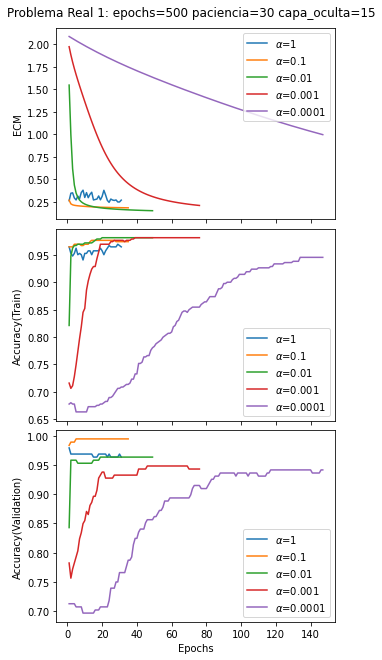

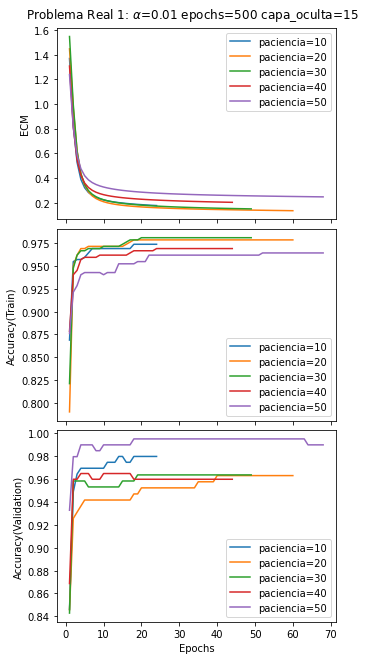

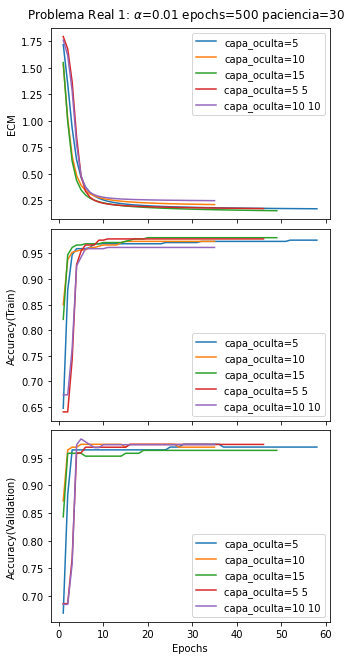

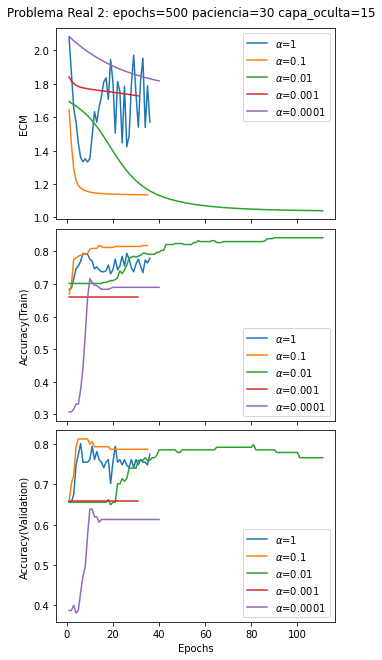

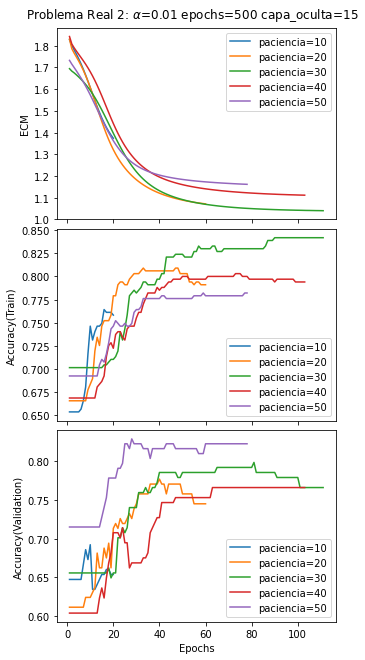

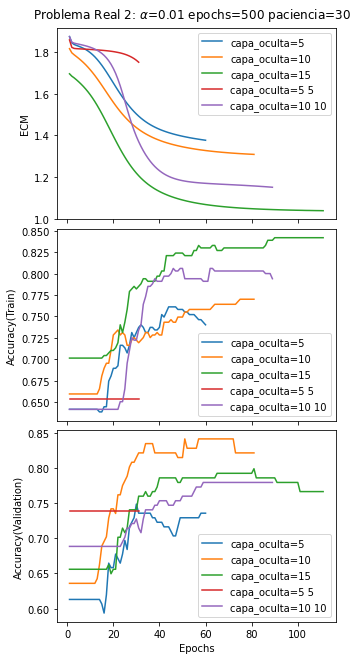

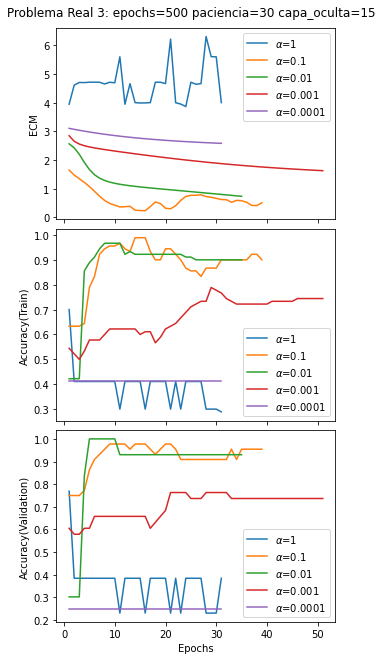

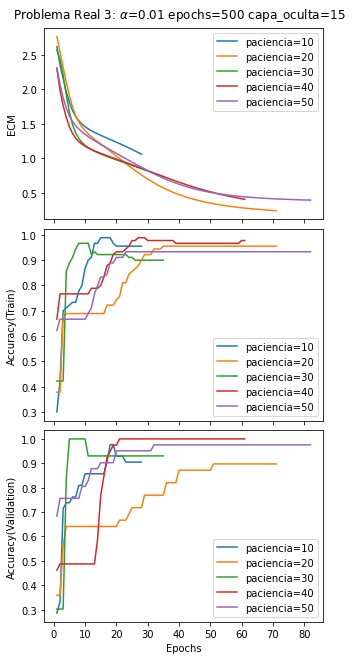

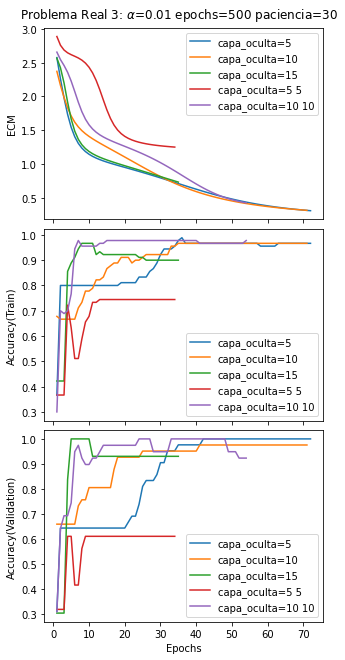

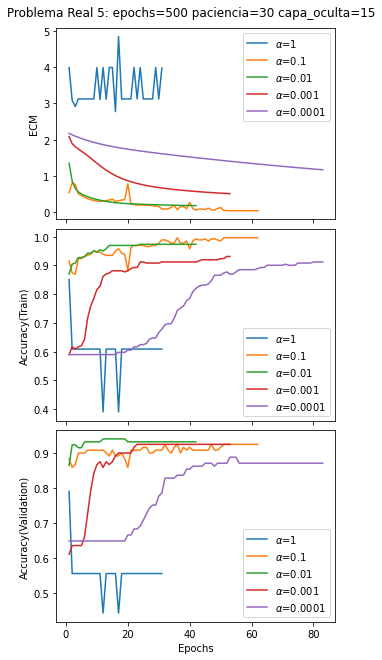

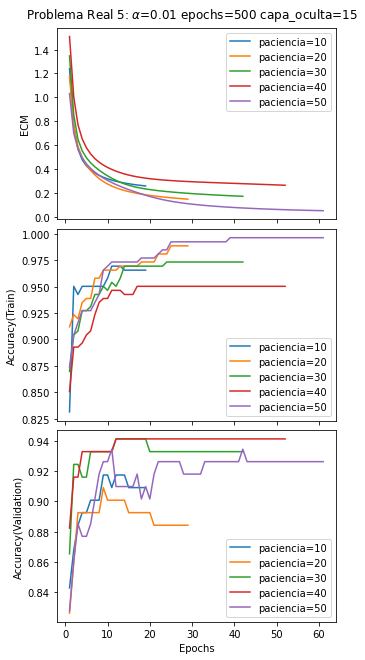

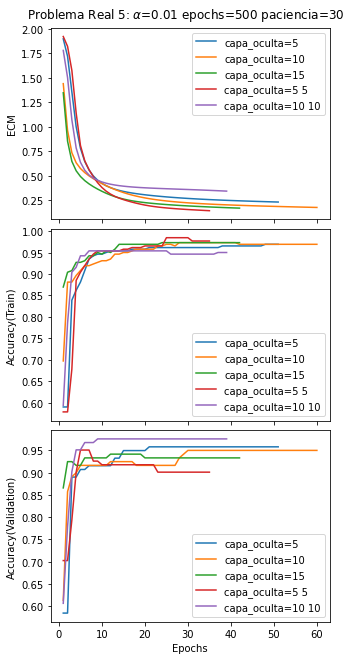

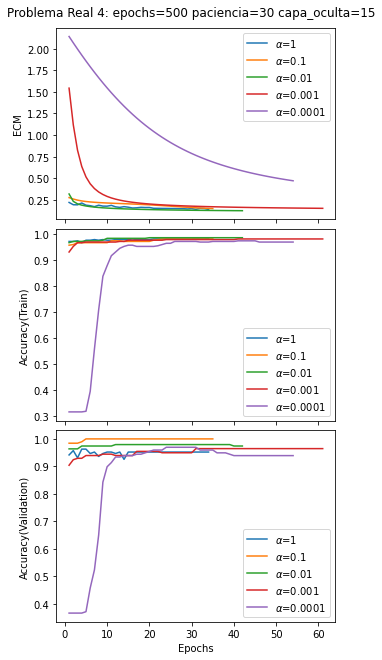

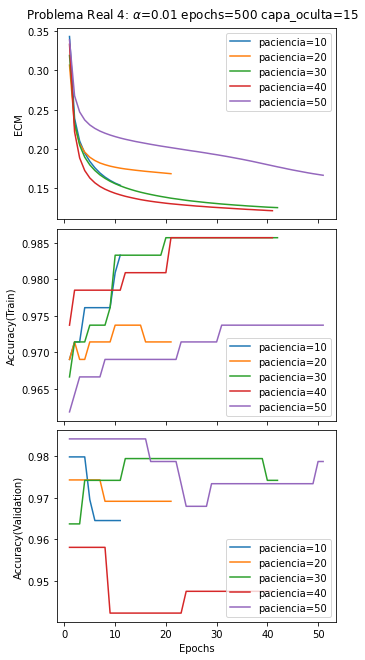

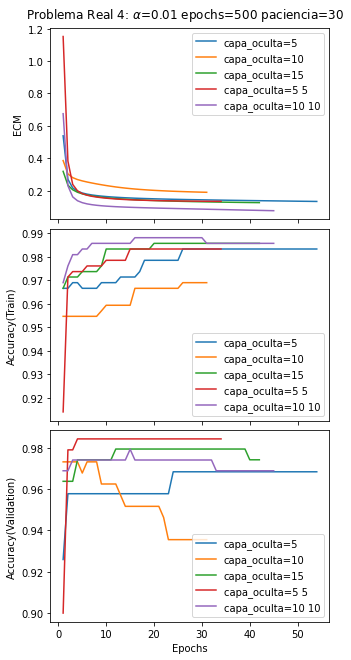

In [7]:
# Execute
for i in range(len(problems)):
    # Alpha test
    plot_data(problem_files[i][0], 0, problems[i])
    # Wait test
    plot_data(problem_files[i][1], 2, problems[i])
    # Layer test
    plot_data(problem_files[i][2], 3, problems[i])

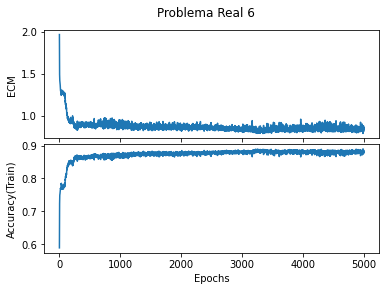

In [3]:
data = pd.read_csv('ejecucion_6.dat', delimiter='\t', error_bad_lines=False, skipfooter=1, engine='python')

# Generación dinámica de contenido
title = 'Problema Real 6'

# Configuración de figura
fig = plt.figure()
gs = fig.add_gridspec(2, hspace=0.05)
ax1, ax2= gs.subplots(sharex=True)

fig.suptitle(title)

ax1.plot(data.iloc[:, 0].values, data.iloc[:, 1].values)
ax1.set_ylabel('ECM')

ax2.plot(data.iloc[:, 0].values, data.iloc[:, 2].values)
ax2.set_ylabel('Accuracy(Train)')

ax2.set_xlabel('Epochs')

plt.subplots_adjust(top=0.90)